In [2]:
print("test")

test


In [3]:
from tensorflow.keras.models import load_model

In [4]:
import cv2

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
model = load_model("modelsolver_v1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 15)          0         
                                                                 
 flatten_2 (Flatten)         (None, 375)               0

In [8]:
test_img = cv2.imread("test_imgs/0.jpeg")
test_img.shape

(50, 50, 3)

In [9]:
cv2.imshow("test image",test_img)
cv2.waitKey()

-1

In [62]:
img = np.array(test_img)
img.shape

(50, 50, 3)

In [11]:
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img[4:img.shape[0] - 4,4:img.shape[1] - 4]
#img= img.reshape((img.shape[0], 28, 28, 1)).astype('float32')


In [63]:
img = cv2.resize(img,(28,28))
img.shape

(28, 28, 3)

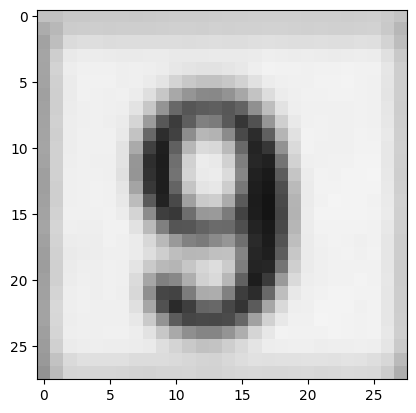

In [25]:
plt.imshow(img)
plt.show()

In [13]:
cv2.imshow("test",img)
cv2.waitKey()

-1

In [64]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [69]:
(thresh, blackAndWhiteImage) = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
blackAndWhiteImage.shape

(28, 28)

In [71]:
bwimg = cv2.bitwise_not(blackAndWhiteImage)

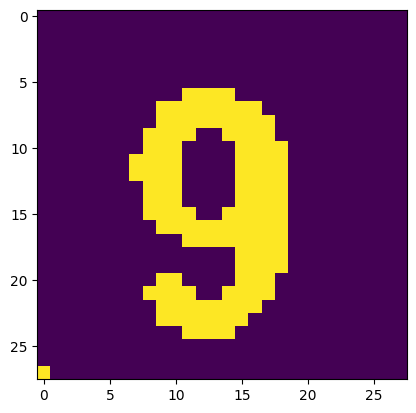

In [72]:
plt.imshow(bwimg)
plt.show()

In [56]:
#img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img_gray = np.expand_dims(img_gray,2)
#img_gray.shape

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x981fb336::Set<1,-1,-1>,struct cv::impl::A0x981fb336::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [73]:
bwimg.shape

(28, 28)

In [74]:
img_new = bwimg.reshape(1,28,28,1).astype('float32')
img_new.shape

(1, 28, 28, 1)

In [76]:
img = img_new/255

In [77]:
img.shape

(1, 28, 28, 1)

In [78]:
pred = model.predict(img)

1/1 [==============================] - 7s 7s/step


In [79]:
pred

array([[2.4196575e-28, 3.0814157e-11, 1.0246368e-14, 1.3378821e-08,
        4.0070969e-08, 4.0150182e-14, 2.4052093e-13, 2.4710899e-15,
        1.5036833e-10, 1.0000000e+00]], dtype=float32)

In [80]:
prediction = np.argmax(pred)
prediction

9